<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/delivery_time_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUSINESS PROBLEM :**
Creating a prediction model of delivery time based on the sorting time

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [20]:
# renaming the column names

In [32]:
time=data.rename(columns={"Delivery Time":"delivery_time","Sorting Time":"sorting_time"})
time


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [33]:
time.shape

(21, 2)

In [34]:
time.columns

Index(['delivery_time', 'sorting_time'], dtype='object')

In [35]:
time.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [36]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [37]:
time[time.duplicated()].shape

(0, 2)

# **INTERPRETATION**:
* The average delivery time is 16.7 minutes which is approximately 17 minutes
* while the average sorting time is 6 minutes
* 50 % of the data lies in the range of 13 to 19 minutes in the delivery time column while 50 % of the data in the sorting time column lies in the range of 4 to 8 minutes
* the mean is slightly greater median , however there is no major skewness in the data

<Axes: >

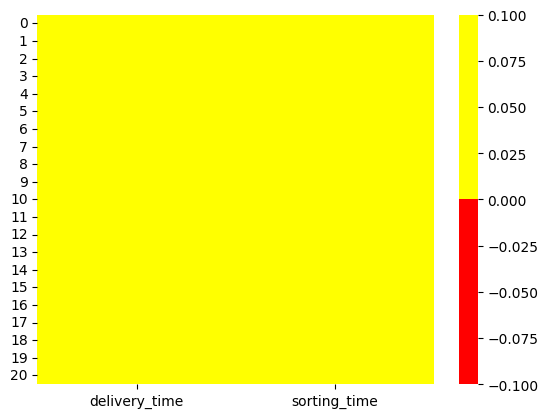

In [39]:
cols=time.columns
color=["#ff0000","#ffff00"]
sns.heatmap(time[cols].isnull(),cmap=sns.color_palette(color))

{'whiskers': [<matplotlib.lines.Line2D at 0x788f032c1c00>,
 'caps': [<matplotlib.lines.Line2D at 0x788f032c2140>,
 'boxes': [<matplotlib.lines.Line2D at 0x788f032c1960>],
 'medians': [<matplotlib.lines.Line2D at 0x788f032c2680>],
 'fliers': [<matplotlib.lines.Line2D at 0x788f032c2920>],
 'means': []}

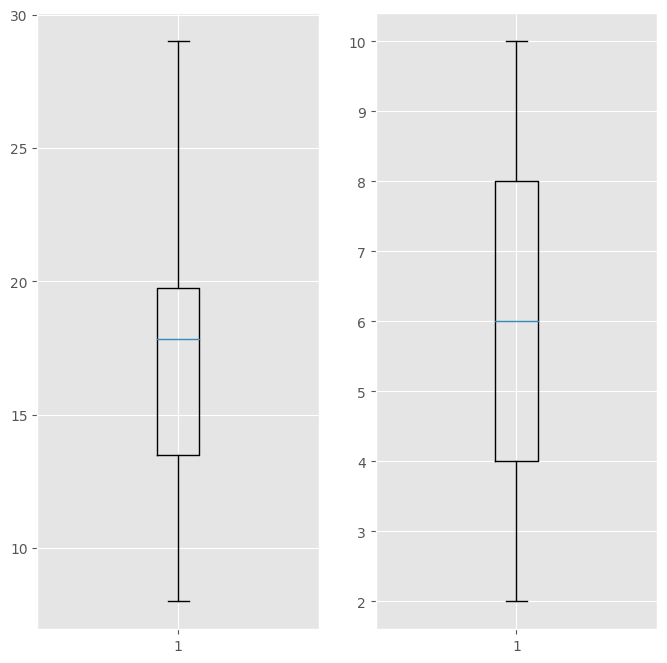

In [42]:
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.boxplot(time["delivery_time"])
plt.subplot(122)
plt.boxplot(time["sorting_time"])

# **INTERPRETATION:**
* The data is free from null values and outliers as there are no values below or above Upper quartile region and Lower quartile region

<Figure size 700x800 with 0 Axes>

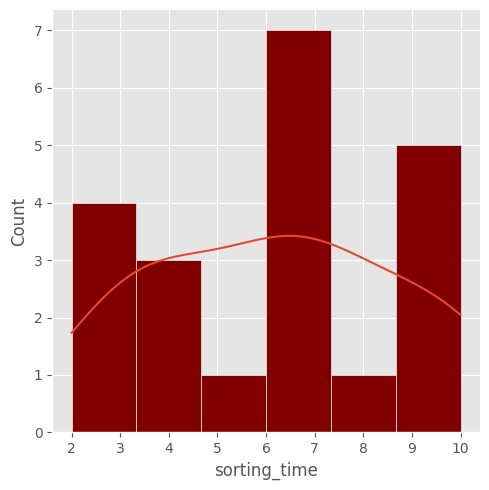

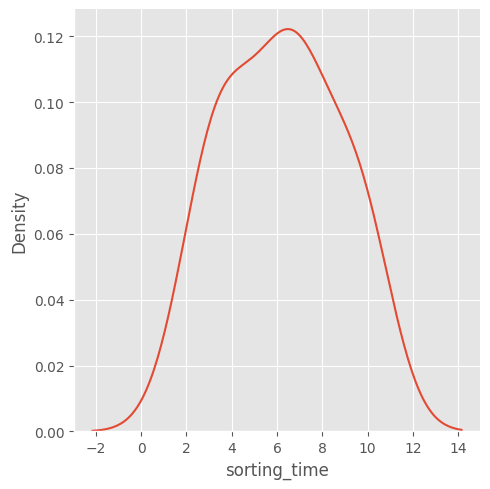

In [55]:
plt.figure(figsize=(7,8))
sns.displot(time,x="sorting_time",kde=True,facecolor="maroon")
sns.displot(time,x="sorting_time",kind="kde")

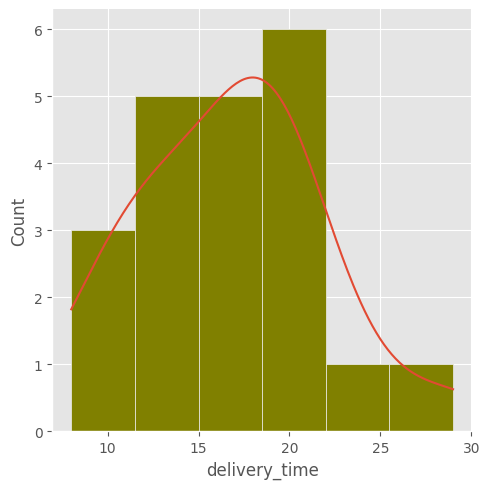

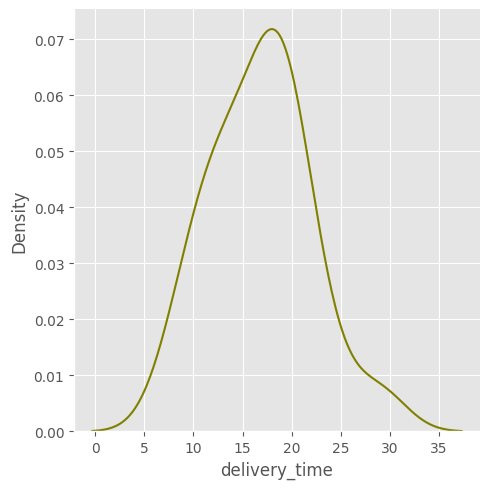

In [56]:
sns.displot(time,x="delivery_time",kde=True,facecolor="olive")
sns.displot(time,x="delivery_time",kind="kde",color="olive")

# **CORRELATION** (relation between two variable)
* x (predictor)=sorting time
* y (target variables )=delivery time

<Axes: >

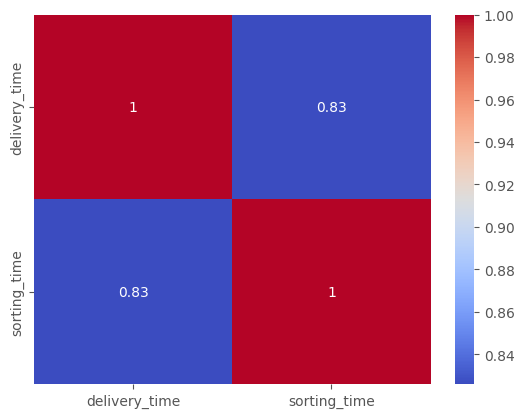

In [58]:
sns.heatmap(time.corr(),annot=True,cmap="coolwarm")

# **SCATTERPLOT**

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

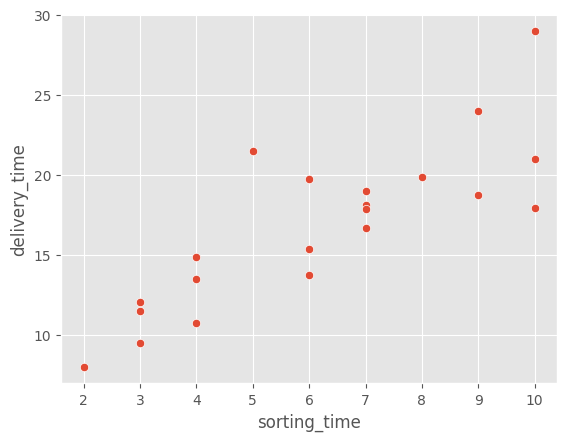

In [59]:
sns.scatterplot(x="sorting_time",y="delivery_time",data=time)

* The correlation between X and Y is **0.83** while there is a **positive linear association** between two variables
* If sorting time increases , delivery time also increases

# **REGRESSION PLOT** (the line of best fit)

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

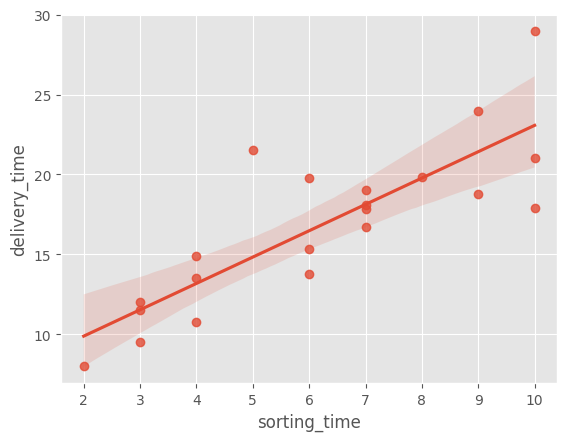

In [60]:
sns.regplot(x="sorting_time",y="delivery_time",data=time)

# **LINEAR REGRESSION MODEL**

In [62]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=time).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           3.98e-06
Time:                        06:39:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model.rsquared

0.6822714748417231

In [64]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [66]:
pred=model.predict(pd.DataFrame(time["sorting_time"]))
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [67]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [69]:
rmse_lin=np.sqrt(np.mean((np.array(time["delivery_time"])-np.array(pred))**2))
rmse_lin

2.7916503270617654

Text(0, 0.5, 'delivery_time')

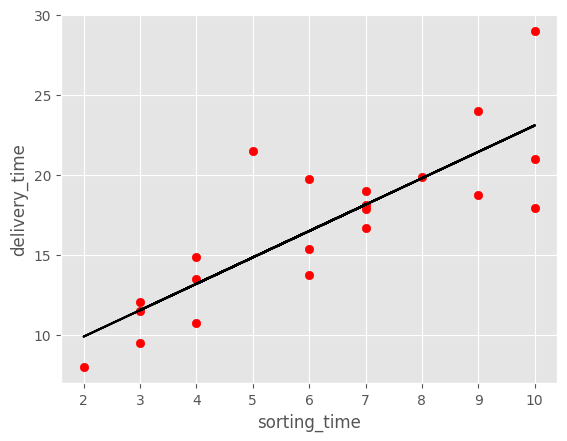

In [70]:
plt.scatter(x=time["sorting_time"],y=time["delivery_time"],color="red")
plt.plot(time["sorting_time"],pred,color="black")
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")

# **INTERPRETATION FROM THE LINEAR REGRESSION :**      
* the R-squared and adjusted R-Squared value value is 0.68 and 0.66 which is below 0.85 . this is not considered as up to the mark
* however , the model can be trained better through transformation


# **LOG TRANSFORMATION**

In [72]:
model2=smf.ols("delivery_time~np.log(sorting_time)",data=time).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           2.64e-06
Time:                        06:54:05   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
model2.rsquared

0.6954434611324223

In [74]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [76]:
pred2=model2.predict(pd.DataFrame(time["sorting_time"]))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [77]:
rmse_log=np.sqrt(np.mean((np.array(time["delivery_time"])-np.array(pred2))**2))
rmse_log

2.733171476682066

Text(0, 0.5, 'delivery_time')

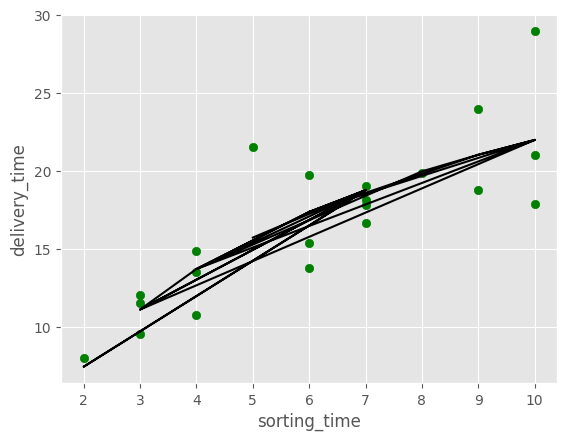

In [78]:
plt.scatter(x=time["sorting_time"],y=time["delivery_time"],color="green")
plt.plot(time["sorting_time"],pred2,color="black")
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")

# **INTERPRETATIONS FROM THE LOG TRANSFORMATIONS**
* Although , the r-squared and adjusted r_squared value has improved from linear transformation to log transformations
from 0.66 to 0.67
* the RMSE value has come down 2.79 to 2.73 making it comparitively better model

# **EXPONENTIAL TRANSFORMATION**

In [80]:
model3=smf.ols("np.log(delivery_time)~sorting_time",data=time).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 24 Jul 2024   Prob (F-statistic):           1.59e-06
Time:                           07:06:01   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
model3.rsquared

0.7109478980584187

In [84]:
pred_expo=model3.predict(pd.DataFrame(time["sorting_time"]))
pred3=np.exp(pred_expo)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [86]:
rmse_expo=np.sqrt(np.mean((np.array(time["delivery_time"])-np.array(pred3))**2))
rmse_expo

2.9402503230562007

Text(0, 0.5, 'delivery_time')

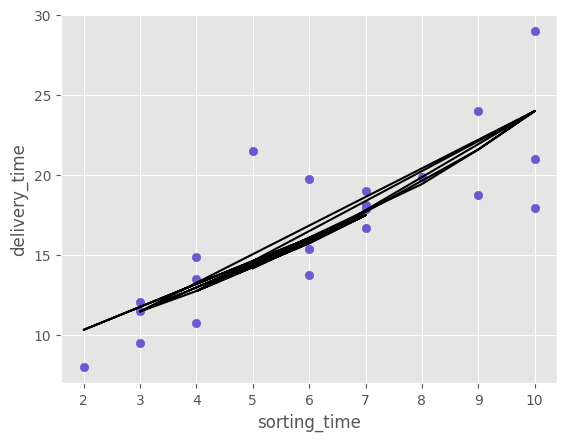

In [88]:
plt.scatter(x=time["sorting_time"],y=time["delivery_time"],color="slateblue")
plt.plot(time["sorting_time"],pred3,color="black")
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")

# **INTERPRETATION FROM EXPONENTIAL TRANSFORMATION:**
* the R_squared and adjusted R_squared has improved from log transformation to exponential transformation straight from 0.69 to 0.71
* while RMSE value has gone up from the previous model
* thus , we can try quadratic transformation

# **QUADRATIC TRANSFORMATION**

In [91]:
time["sorting_time_sq"]=time["sorting_time"]*time["sorting_time"]
time

,delivery_time,sorting_time,sorting_time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [93]:
model4=smf.ols("np.log(delivery_time)~sorting_time+sorting_time_sq",data=time).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Wed, 24 Jul 2024   Prob (F-statistic):           2.20e-06
Time:                           07:22:07   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time        0.2659      0.080      3.315      0.004       0.097       0.434
sorting_time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model4.rsquared

0.7648666342953729

In [95]:
model4.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [98]:
pred_qua=model4.predict(time)
pred4=np.exp(pred_qua)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [100]:
rmse_qud=np.sqrt(np.mean((np.array(time["delivery_time"])-np.array(pred4))**2))
rmse_qud

2.799041988740932

Text(0, 0.5, 'delivery_time')

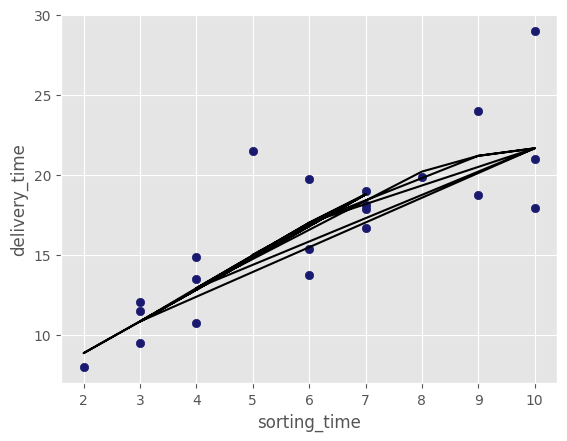

In [101]:
plt.scatter(x=time["sorting_time"],y=time["delivery_time"],color="midnightblue")
plt.plot(time["sorting_time"],pred4,color="black")
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")

In [102]:
data={"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_expo","rmse_qud"]),
      "RMSE VALUES":pd.Series([rmse_lin,rmse_log,rmse_expo,rmse_qud]),
      "R_SQUARED":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}

In [104]:
table=pd.DataFrame(data)
table

,MODEL,RMSE VALUES,R_SQUARED
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_expo,2.940250,0.710948
3,rmse_qud,2.799042,0.764867


* Model 4 seems to be a better model as it has highest R_squared values and lesses RMSE value

# **MODEL VALIDATION**

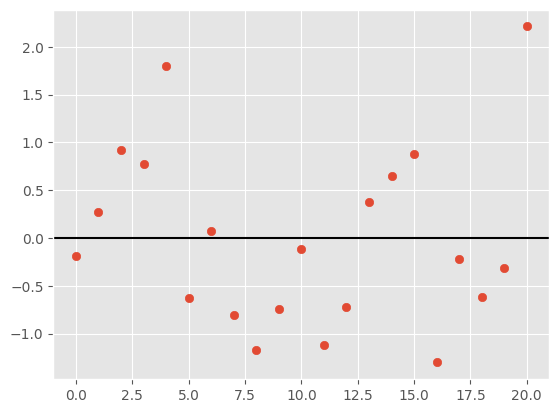

In [107]:
plt.scatter(np.arange(21),model4.resid_pearson)
plt.axhline(y=0,color="black")

* there is no pattern traced and mean =0 making it a valid model

# **PREDICTED VALUES**

In [108]:
delivery_time=pd.DataFrame()
delivery_time["sorting_time"]=pd.Series(time["sorting_time"])
delivery_time["delivery_time"]=pd.Series(time["delivery_time"])
delivery_time["predicted_delivery_time"]=pd.Series(pred4)

In [109]:
delivery_time

,sorting_time,delivery_time,predicted_delivery_time
0,10,21.00,21.646921
1,4,13.50,12.909227
2,6,19.75,16.995933
3,9,24.00,21.176938
4,10,29.00,21.646921
5,6,15.35,16.995933
6,7,19.00,18.764526
7,3,9.50,10.825502
8,10,17.90,21.646921
9,9,18.75,21.176938
